**1. Import Dependencies and Data**

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt


In [ ]:
train=datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
test=datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset=torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [ ]:
testset=torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

**2. Build and Compile Model**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

In [ ]:
net=Net()
print(net)


**3. Fit, Predict, and Evaluate**

In [ ]:
optimizer=optim.Adam(net.parameters(),lr=0.01)

In [ ]:
EPOCHS=5

In [ ]:
for epoch in range(EPOCHS):
  for data in trainset:
    X, y=data
    net.zero_grad()
    output=net(X.view(-1,28*28))
    loss=F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
print(loss)

tensor(0.1487, grad_fn=<NllLossBackward>)


Calculate Accuracy

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.946


Predict

<function matplotlib.pyplot.show>

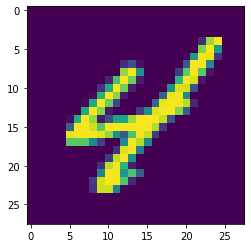

In [ ]:
plt.imshow(X[9].view(28,28))
plt.show

In [ ]:
torch.argmax(net(X[9].view(-1,784))[0])

tensor(4)